In [57]:
import sys
sys.path.append('../')
import numpy as np

import test_suite

In [58]:
import matplotlib.pyplot as plt

plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 8
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["font.size"] = 24
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["figure.figsize"] = (6, 6)


In [59]:
def get_eps_c(xc, input):
  input = np.meshgrid(*input, indexing='ij')
  eps_c = test_suite.get_eps_xc(xc, input)
  return eps_c

def second_deriv_check_plot(input, eps_c, r_s_dx):
  r_s_mesh = input[0]
  n = test_suite.get_density(r_s_mesh)
  eps_x_unif = test_suite.get_eps_x_unif(n)

  f_c = eps_c.reshape(r_s_mesh.shape) / eps_x_unif

  f_c_grad = np.gradient(f_c, r_s_dx, edge_order=2, axis=0)
  f_c_2grad = np.diff(f_c, 2, axis=0) / (r_s_dx**2)

  r_s_mesh = r_s_mesh[1:-1]
  f_c_grad = f_c_grad[1:-1]

  # avoid dividing by r_s...
  to_plot = r_s_mesh**2 * f_c_2grad + (2 * r_s_mesh * f_c_grad) 
  return to_plot


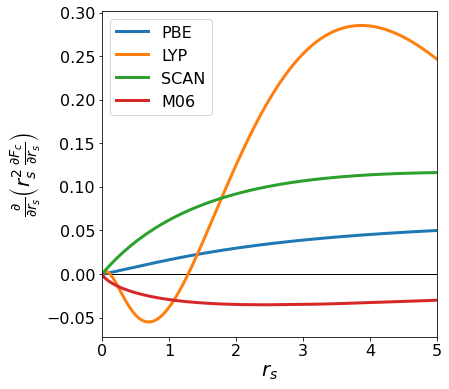

In [60]:

r_s = np.linspace(0.0001, 5, 10000)
s = np.array([2])
zeta = np.array([0])
alpha = np.array([0.5])

r_s_dx = r_s[1] - r_s[0]

# PBE
xc = 'gga_c_pbe'
input = [r_s, s, zeta]
eps_c = get_eps_c(xc, input)
to_plot = second_deriv_check_plot(input, eps_c, r_s_dx)
plt.plot(r_s[1:-1], to_plot, label='PBE')

# LYP
xc = 'gga_c_lyp'
input = [r_s, s, zeta]
eps_c = get_eps_c(xc, input)
to_plot = second_deriv_check_plot(input, eps_c, r_s_dx)
plt.plot(r_s[1:-1], to_plot, label='LYP')

# SCAN
xc = 'mgga_c_scan'
input = [r_s, s, zeta, alpha]
eps_c = get_eps_c(xc, input)
to_plot = second_deriv_check_plot(input, eps_c, r_s_dx)
plt.plot(r_s[1:-1], to_plot, label='SCAN')

# SCAN
xc = 'mgga_c_m06'
input = [r_s, s, zeta, alpha]
eps_c = get_eps_c(xc, input)
to_plot = second_deriv_check_plot(input, eps_c, r_s_dx)
plt.plot(r_s[1:-1], to_plot, label='M06')

plt.axhline(0,color='black', zorder=0, linewidth=1) 
plt.xlim(left=0, right=5)
plt.legend()
plt.ylabel(r'$\frac{\partial{}}{\partial{r_s}} \left( r_s^2 \, \frac{\partial{F_c}}{\partial{r_s}} \right)$')
plt.xlabel('$r_s$')
plt.savefig('second_deriv_check.pdf', bbox_inches='tight')